### Import Packages

In [24]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

### Import data

In [39]:
apts = pd.read_csv('../data/apartments.csv')

In [40]:
apts = apts.iloc[:,1:]

In [41]:
apts.head()

,title,text,latitude,longitude,city_text,date_posted,date_updated,price,deleted,sqft,bedrooms,bathrooms,pets,laundry,parking,craigslist,place,city,state,county
0,$895 / 1br - 500ft2 - 1 BD + 1 BD WATER PAID$ ...,QR Code Link to This Post\n \n ...,34.860788,-118.170104,W. ROSAMOND BLVD. / B ST.,2018-10-08 22:29:36,2018-10-15 13:07:37,895.0,False,500.0,1.0,1.0,none,shared,off-street,losangeles,Rosamond,NaN,CA,Kern
1,$895 / 1br - 500ft2 - 1 BD + 1 BD WATER PAID$ ...,QR Code Link to This Post\n \n ...,34.861017,-118.169932,W. ROSAMOND BLVD. / B ST.,2018-10-15 11:44:23,NaN,895.0,False,500.0,1.0,1.0,none,shared,off-street,losangeles,Rosamond,NaN,CA,Kern
2,$895 / 1br - 500ft2 - 1 BD + 1 BD WATER PAID$ ...,QR Code Link to This Post\n \n ...,34.861017,-118.169932,W. ROSAMOND BLVD. / B ST.,2018-10-15 11:53:06,NaN,895.0,False,500.0,1.0,1.0,none,shared,off-street,losangeles,Rosamond,NaN,CA,Kern
3,$895 / 1br - 500ft2 - 1 BD + 1 BD WATER PAID$ ...,QR Code Link to This Post\n \n ...,34.861017,-118.169932,W. ROSAMOND BLVD. / B ST.,2018-10-15 13:30:43,NaN,895.0,False,500.0,1.0,1.0,none,shared,off-street,losangeles,Rosamond,NaN,CA,Kern
4,$895 / 1br - 500ft2 - 1 BD + 1 BD WATER PAID$ ...,QR Code Link to This Post\n \n ...,34.860683,-118.169997,W. ROSAMOND BLVD. / B ST.,2018-10-15 13:36:07,NaN,895.0,False,500.0,1.0,1.0,none,shared,off-street,losangeles,Rosamond,NaN,CA,Kern


In [35]:
apts.describe()

,latitude,longitude,price,sqft,bedrooms,bathrooms
count,21864.000000,21864.000000,2.184500e+04,16357.000000,20900.000000,20900.000000
mean,36.694257,-120.871645,4.488750e+03,885.330195,1.489809,1.326124
std,2.024755,2.327231,2.402130e+05,1588.511928,0.791082,0.520324
min,28.311200,-123.340577,0.000000e+00,1.000000,0.000000,0.000000
25%,34.208205,-122.299800,1.720000e+03,680.000000,1.000000,1.000000
50%,37.576840,-121.953605,2.288000e+03,835.000000,1.000000,1.000000
75%,37.915600,-118.472888,2.915000e+03,1025.000000,2.000000,2.000000
max,47.680645,-72.922161,3.408374e+07,200000.000000,7.000000,6.000000


In [47]:
set(apts['craigslist'])

{'losangeles',
 'sacramento',
 'sandiego',
 'sfbay_eby',
 'sfbay_nby',
 'sfbay_pen',
 'sfbay_sby',
 'sfbay_sfc'}

In [76]:
set(apts['city'])

{'Agoura Hills',
 'Alameda',
 'Albany',
 'Alhambra',
 'American Canyon',
 'Antioch',
 'Arcadia',
 'Atherton',
 'Auburn',
 'Azusa',
 'Bakersfield',
 'Baldwin Park',
 'Bell Gardens',
 'Bellflower',
 'Belmont',
 'Belvedere',
 'Benicia',
 'Berkeley',
 'Beverly Hills',
 'Brentwood',
 'Brisbane',
 'Burbank',
 'Burlingame',
 'Calistoga',
 'Campbell',
 'Carlsbad',
 'Carson',
 'Cerritos',
 'Chula Vista',
 'Citrus Heights',
 'Claremont',
 'Clearlake',
 'Cloverdale',
 'Colfax',
 'Colma',
 'Compton',
 'Concord',
 'Coronado',
 'Corte Madera',
 'Costa Mesa',
 'Cotati',
 'Covina',
 'Culver City',
 'Cupertino',
 'Cypress',
 'Daly City',
 'Danville',
 'Davis',
 'Del Mar',
 'Diamond Bar',
 'Downey',
 'Duarte',
 'Dublin',
 'Dunsmuir',
 'East Palo Alto',
 'El Cajon',
 'El Cerrito',
 'El Monte',
 'El Segundo',
 'Elk Grove',
 'Emeryville',
 'Encinitas',
 'Escondido',
 'Fairfax',
 'Fairfield',
 'Folsom',
 'Foster City',
 'Fremont',
 'Garden Grove',
 'Gardena',
 'Gilroy',
 'Glendale',
 'Glendora',
 'Half Moon

## Visualization

In [102]:
# pets 
pets = apts[(~apts['sqft'].isna()) &
               (~apts['price'].isna()) &
                (~apts['pets'].isna()) &
                (apts['pets'].isin(['both', 'none'])) &
#                 (apts['pets'].isin(['dogs', 'cats'])) &
               (apts["state"] == "CA") & 
               (apts["city"] == "San Francisco")]

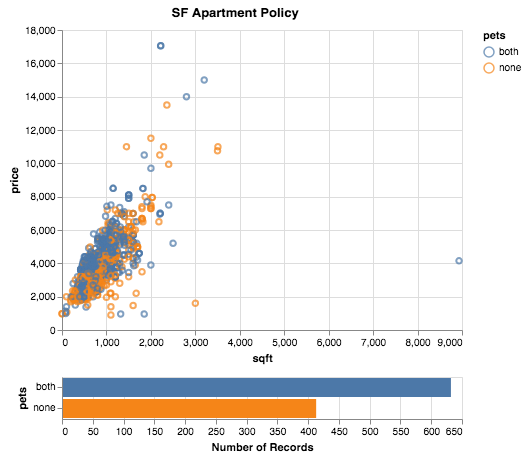

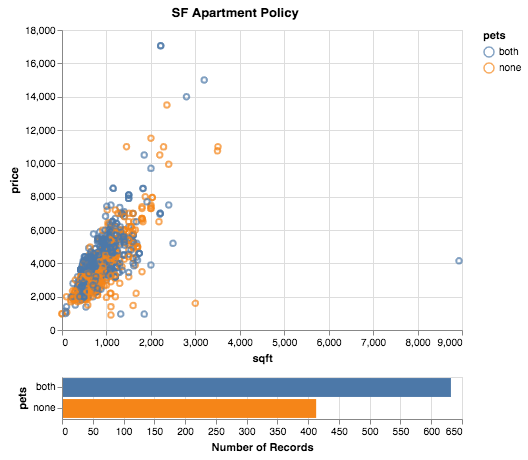

In [118]:
alt.data_transformers.enable('csv')
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='sqft:Q',
    y='price:Q',
    color=alt.condition(brush, 'pets:N', alt.value('lightgray'))
).properties(
    title='SF Apartment Policy'
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    y='pets:N',
    color='pets:N',
    x='count(pets):Q'
).transform_filter(
    brush
)

chart1 = alt.vconcat(points, bars, data=pets)
chart1.save('pets_SF.html')
chart1

In [108]:
%pwd

'/Users/Nina/Documents/classes/msds622/data_visualization'

In [104]:
# pets 
pets_LA = apts[(~apts['sqft'].isna()) &
               (~apts['price'].isna()) &
                (~apts['pets'].isna()) & 
                (apts['pets'].isin(['both', 'none'])) &

#                 (apts['pets'].isin(['dogs', 'cats'])) &

               (apts["state"] == "CA") & 
               (apts["city"] == "Los Angeles")]

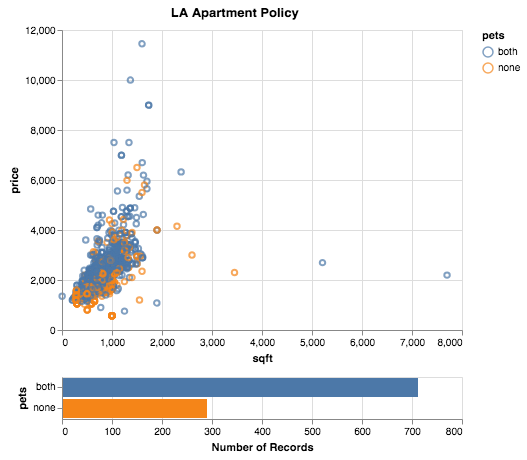

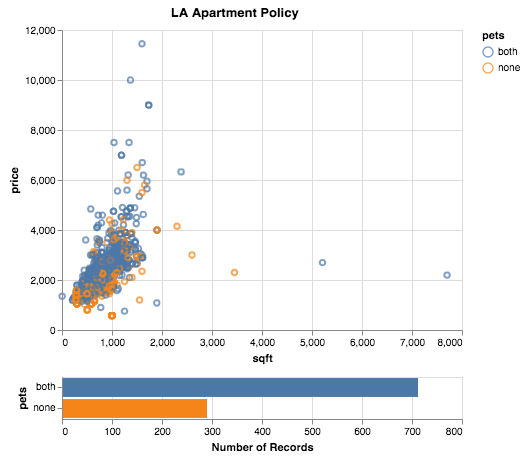

In [117]:
alt.data_transformers.enable('csv')
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='sqft:Q',
    y='price:Q',
    color=alt.condition(brush, 'pets:N', alt.value('lightgray'))).properties(
    title='LA Apartment Policy'
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    y='pets:N',
    color='pets:N',
    x='count(pets):Q'
).transform_filter(
    brush
)

chart2 = alt.vconcat(points, bars, data=pets_LA)
chart2.save('pets_LA.html')
chart2